# Optimizing YouTube Channel Engagement and Revenue

_A Google Colab compatible notebook: EDA, Feature Engineering, Predictive Models (Revenue & Subscriber Growth), Visualizations, and Export_


In [1]:

import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("youtube_channel_real_performance_analytics.csv")

# Confirm successful load
print("✅ Dataset loaded successfully!")
df.info()


✅ Dataset loaded successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 70 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  364 non-null    int64  
 1   Video Duration                      364 non-null    float64
 2   Video Publish Time                  364 non-null    object 
 3   Days Since Publish                  364 non-null    int64  
 4   Day                                 364 non-null    int64  
 5   Month                               364 non-null    int64  
 6   Year                                364 non-null    int64  
 7   Day of Week                         364 non-null    object 
 8   Revenue per 1000 Views (USD)        364 non-null    float64
 9   Monetized Playbacks (Estimate)      364 non-null    float64
 10  Playback-Based CPM (USD)            364 non-null    float64
 11  CPM (USD)     

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import warnings
warnings.filterwarnings('ignore')
print('Libraries imported')

Libraries imported


In [3]:
import pandas as pd
import numpy as np
df.info()
print('\nDataset shape:', df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 70 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  364 non-null    int64  
 1   Video Duration                      364 non-null    float64
 2   Video Publish Time                  364 non-null    object 
 3   Days Since Publish                  364 non-null    int64  
 4   Day                                 364 non-null    int64  
 5   Month                               364 non-null    int64  
 6   Year                                364 non-null    int64  
 7   Day of Week                         364 non-null    object 
 8   Revenue per 1000 Views (USD)        364 non-null    float64
 9   Monetized Playbacks (Estimate)      364 non-null    float64
 10  Playback-Based CPM (USD)            364 non-null    float64
 11  CPM (USD)                           364 non-n

In [4]:
import pandas as pd
import numpy as np
if 'Video Publish Time' in df.columns:
    df['Video Publish Time'] = pd.to_datetime(df['Video Publish Time'])
    df['Publish_Hour'] = df['Video Publish Time'].dt.hour
    df['Publish_DayOfWeek'] = df['Video Publish Time'].dt.day_name()

df['Revenue_per_View'] = df['Estimated Revenue (USD)'] / (df['Views'].replace(0, np.nan))
df['Engagement_Score'] = (df.get('Likes',0) + df.get('Shares',0) + df.get('Comments',0)) / df['Views'].replace(0, np.nan) * 100
df['Retention_Score'] = df['Average View Percentage (%)'] * df['Average View Duration']

In [5]:
import pandas as pd
import numpy as np
df = df.copy()
df['Revenue_per_View'] = df['Estimated Revenue (USD)'] / (df['Views'].replace(0, np.nan))
df['Engagement_Score'] = (df.get('Likes',0) + df.get('Shares',0) + df.get('Comments',0)) / df['Views'].replace(0, np.nan) * 100
df['Retention_Score'] = df['Average View Percentage (%)'] * df['Average View Duration']
df['Engagement_Score'] = df['Engagement_Score'].fillna(0)
df['Revenue_per_View'] = df['Revenue_per_View'].fillna(0)
df[['Revenue_per_View','Engagement_Score','Retention_Score']].describe()

,Revenue_per_View,Engagement_Score,Retention_Score
count,364.000000,364.000000,364.000000
mean,0.000112,5.074407,12797.119863
std,0.000178,2.012113,5334.555865
min,0.000000,2.120928,604.160000
25%,0.000015,3.592842,9991.687500
50%,0.000050,4.500543,13239.640000
75%,0.000144,6.402126,16229.067500
max,0.001521,12.023898,30396.300000


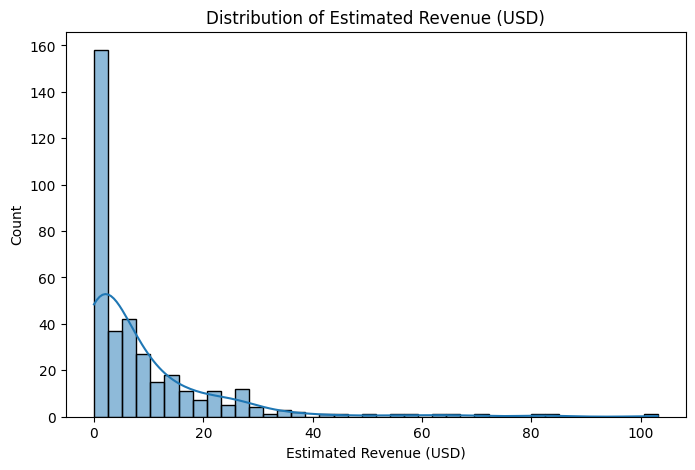

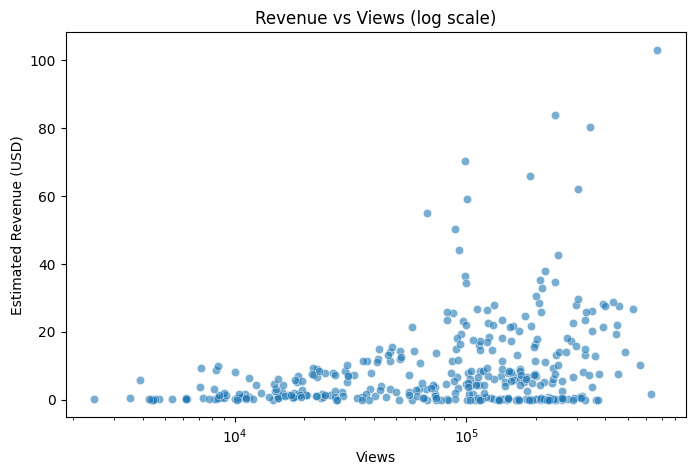

In [6]:
import pandas as pd
import numpy as np
plt.figure(figsize=(8,5))
sns.histplot(df['Estimated Revenue (USD)'], bins=40, kde=True)
plt.title('Distribution of Estimated Revenue (USD)')
plt.xlabel('Estimated Revenue (USD)')
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x='Views', y='Estimated Revenue (USD)', data=df, alpha=0.6)
plt.xscale('log')
plt.title('Revenue vs Views (log scale)')
plt.show()

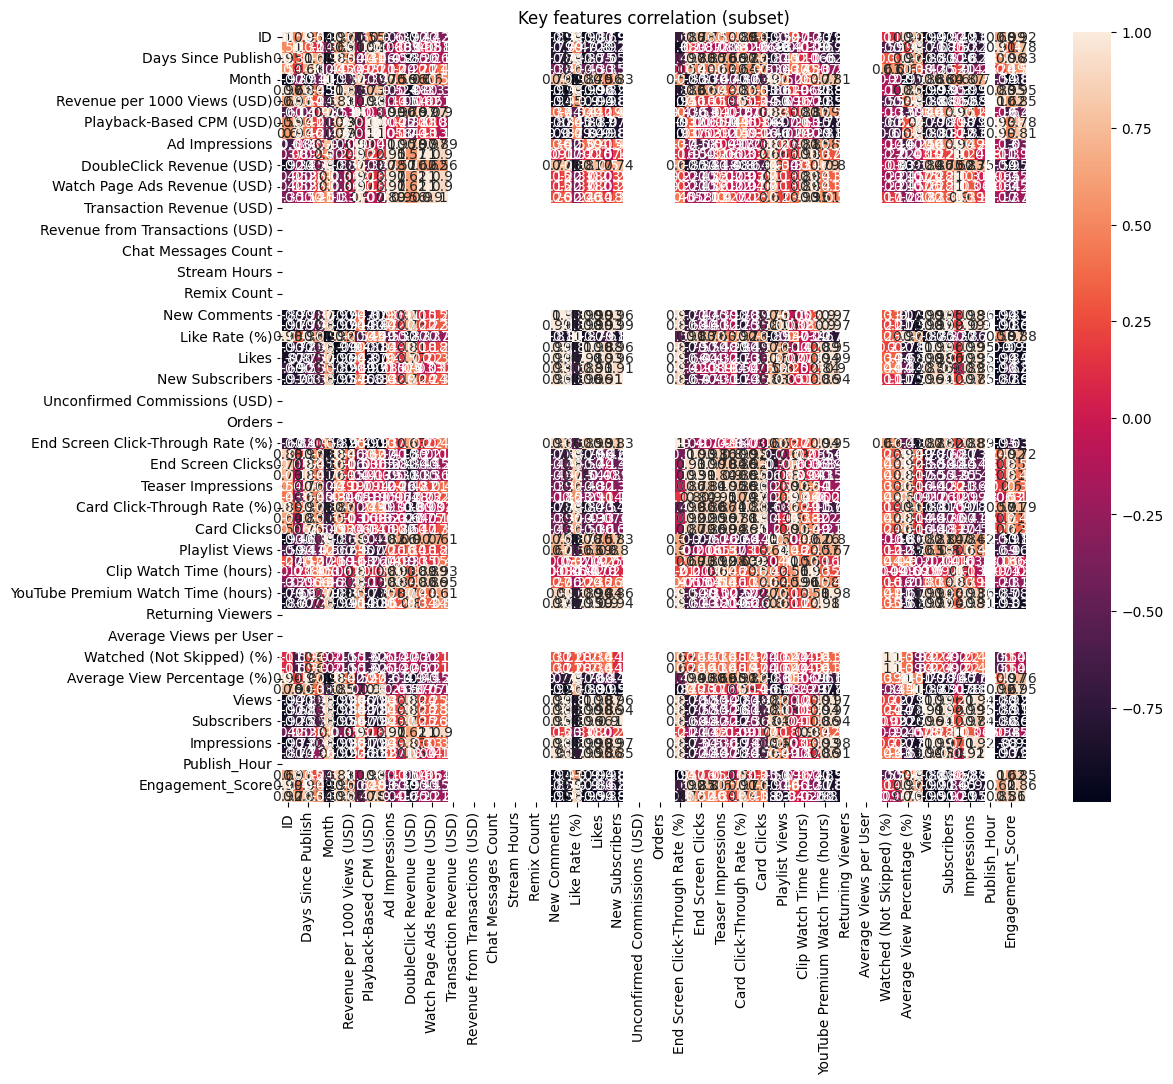

In [7]:
import pandas as pd
import numpy as np
numeric = df.select_dtypes(include=[np.number])
corr = numeric.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr.loc[['Views','Watch Time (hours)','Subscribers','Estimated Revenue (USD)','Engagement_Score','Revenue_per_View']].corr(), annot=True)
plt.title('Key features correlation (subset)')
plt.show()

In [8]:
import pandas as pd
import numpy as np
features_rev = ['Views','Subscribers','Watch Time (hours)','Engagement_Score','Average View Percentage (%)','Revenue_per_View','Impressions']
features_rev = [f for f in features_rev if f in df.columns]
X_rev = df[features_rev].fillna(0)
y_rev = df['Estimated Revenue (USD)']
X_train_rev, X_test_rev, y_train_rev, y_test_rev = train_test_split(X_rev, y_rev, test_size=0.2, random_state=42)
rf_rev = RandomForestRegressor(n_estimators=100, random_state=42)
rf_rev.fit(X_train_rev, y_train_rev)
y_pred_rev = rf_rev.predict(X_test_rev)
mse_rev = mean_squared_error(y_test_rev, y_pred_rev)
r2_rev = r2_score(y_test_rev, y_pred_rev)
print(f'Revenue model RMSE: {np.sqrt(mse_rev):.4f}, R2: {r2_rev:.4f}')

Revenue model RMSE: 2.2723, R2: 0.9407


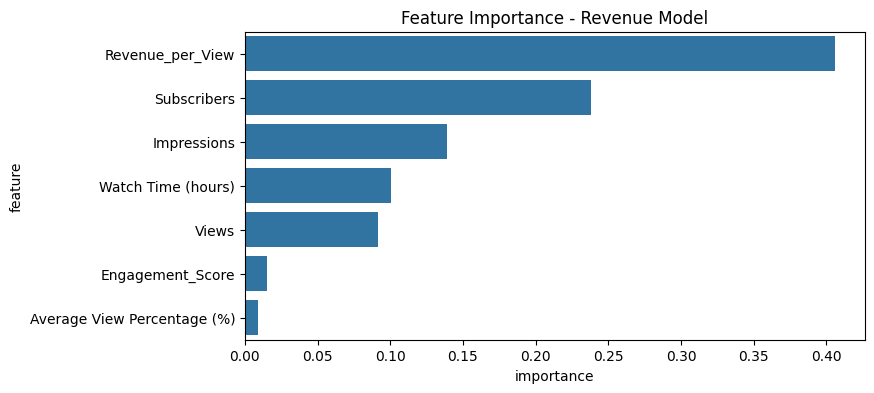

In [9]:
importances = rf_rev.feature_importances_
fi = pd.DataFrame({'feature': X_rev.columns, 'importance': importances}).sort_values('importance', ascending=False)
fi
plt.figure(figsize=(8,4))
sns.barplot(x='importance', y='feature', data=fi)
plt.title('Feature Importance - Revenue Model')
plt.show()

In [10]:
import pandas as pd
import numpy as np
target_sub = 'New Subscribers' if 'New Subscribers' in df.columns else 'Subscribers'
features_sub = ['Views','Watch Time (hours)','Engagement_Score','Average View Percentage (%)','Video Duration']
features_sub = [f for f in features_sub if f in df.columns]
X_sub = df[features_sub].fillna(0)
y_sub = df[target_sub]
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_sub, y_sub, test_size=0.2, random_state=42)
gbr_sub = GradientBoostingRegressor(n_estimators=150, random_state=42)
gbr_sub.fit(X_train_sub, y_train_sub)
y_pred_sub = gbr_sub.predict(X_test_sub)
mse_sub = mean_squared_error(y_test_sub, y_pred_sub)
r2_sub = r2_score(y_test_sub, y_pred_sub)
print(f'Subscriber model RMSE: {np.sqrt(mse_sub):.4f}, R2: {r2_sub:.4f}')

Subscriber model RMSE: 277.5536, R2: 0.5812




## Next steps you can run in Google Colab

1. Upload the CSV to Colab (or mount Google Drive) and run this notebook.
2. Tune hyperparameters, try cross-validation, or try other models like XGBoost.
3. Export results, create dashboards (Streamlit / Dash), or schedule model retraining.



# 📊 YouTube Channel Analytics Dashboard

This section adds an **interactive analytics dashboard** summarizing your YouTube channel's performance.  
It includes both **individual charts** (for easier editing) and a **combined dashboard view** (for presentation).


In [11]:
import pandas as pd
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from IPython.display import display


In [12]:
# --- Data: replace this with your own data loading ---
# Example: df = pd.read_csv('your_youtube_data.csv')
np.random.seed(42)
n = 100
df = pd.DataFrame({
    'Video': [f'Video {i+1}' for i in range(n)],
    'Views': np.random.randint(100, 200000, size=n),
    'Likes': np.random.randint(0, 5000, size=n),
    'Comments': np.random.randint(0, 800, size=n),
    'WatchTimeMinutes': np.random.randint(50, 20000, size=n),
    'RevenueUSD': np.round(np.random.rand(n) * 2000, 2),
    'PublishDate': pd.date_range(end=pd.Timestamp.today(), periods=n).tolist()
})

display(df.head())


,Video,Views,Likes,Comments,WatchTimeMinutes,RevenueUSD,PublishDate
0,Video 1,122058,2027,510,7072,877.94,2025-08-12 13:42:34.537127
1,Video 2,146967,2695,751,9201,156.91,2025-08-13 13:42:34.537127
2,Video 3,132032,1495,143,5650,50.70,2025-08-14 13:42:34.537127
3,Video 4,103794,391,608,8046,1925.30,2025-08-15 13:42:34.537127
4,Video 5,119979,4514,200,9057,1671.96,2025-08-16 13:42:34.537127


In [13]:
# --- KPI calculations (adjust to your real column names) ---
total_views = int(df['Views'].sum())
total_watch_time = int(df['WatchTimeMinutes'].sum())
total_revenue = float(df['RevenueUSD'].sum())

avg_views = float(df['Views'].mean())
median_watch = float(df['WatchTimeMinutes'].median())

total_views, total_watch_time, total_revenue, avg_views, median_watch


(9558187, 1003439, 97392.51, 95581.87, 9579.0)

In [14]:
# --- Plotly dashboard (fixed indicator usage) ---
fig = make_subplots(
    rows=2, cols=3,
    specs=[
        [{'type':'xy'}, {'type':'xy'}, {'type':'xy'}],
        [{'type':'xy'}, {'type':'xy'}, {'type':'domain'}]   # domain cell for indicators
    ],
    horizontal_spacing=0.06,
    vertical_spacing=0.08,
    subplot_titles=("Views over time", "Likes distribution", "Comments vs Likes", 
                    "Watch Time distribution", "Revenue by Video", "Summary KPIs")
)

# Example traces (replace with your own plots)
fig.add_trace(go.Scatter(x=df['PublishDate'], y=df['Views'], mode='lines+markers', name='Views'), row=1, col=1)

fig.add_trace(go.Histogram(x=df['Likes'], nbinsx=30, name='Likes'), row=1, col=2)

fig.add_trace(go.Scatter(x=df['Likes'], y=df['Comments'], mode='markers',
                         marker=dict(size=8, opacity=0.7), name='Comments vs Likes'), row=1, col=3)

fig.add_trace(go.Box(y=df['WatchTimeMinutes'], name='Watch Time (min)'), row=2, col=1)

top_rev = df.nlargest(10, 'RevenueUSD').sort_values('RevenueUSD', ascending=True)
fig.add_trace(go.Bar(x=top_rev['RevenueUSD'], y=top_rev['Video'], orientation='h', name='Top Revenue'), row=2, col=2)

# Indicators
fig.add_trace(go.Indicator(
    mode='number',
    value=total_views,
    title={'text': "<b>Total Views</b><br><span style='font-size:12px'>All time</span>"},
    number={'font': {'size': 28, 'color': '#4F9DFF'}, 'valueformat':','},
    domain={'x': [0.0, 0.33], 'y': [0, 1]}
), row=2, col=3)

fig.add_trace(go.Indicator(
    mode='number',
    value=total_watch_time,
    title={'text': "<b>Total Watch Time</b><br><span style='font-size:12px'>minutes</span>"},
    number={'font': {'size': 28, 'color': '#4F9DFF'}, 'valueformat':','},
    domain={'x': [0.33, 0.66], 'y': [0, 1]}
), row=2, col=3)

fig.add_trace(go.Indicator(
    mode='number',
    value=total_revenue,
    title={'text': "<b>Total Revenue</b><br><span style='font-size:12px'>USD</span>"},
    number={'font': {'size': 28, 'color': '#4F9DFF'}, 'valueformat':'.2f', 'prefix':'$'},
    domain={'x': [0.66, 1.0], 'y': [0, 1]}
), row=2, col=3)

fig.update_layout(height=800, showlegend=False, paper_bgcolor='white', title_text='YouTube Optimization Dashboard (Repaired)')
fig.update_layout(margin=dict(t=80, b=40, l=40, r=40))

fig.show()

# -------------------------------
# BEST EXPORT SETTINGS (add here)
# -------------------------------

# Export interactive HTML
fig.write_html("youtube_dashboard.html", include_plotlyjs='cdn')

# Export PNG image
fig.write_image("youtube_dashboard.png")
